# Import Libraries

In [43]:
# importing libraries
import pandas as pd # the pd is by convention
import numpy as np # as is the np
import matplotlib.pyplot as plt
import cenpy
import geopandas as gpd
import matplotlib.dates as mdates
import matplotlib
# to plot matplotlib figures inline on the notebook
%matplotlib inline

# Get median income data by zip code from census ACS 2020 1-year estimates

* the cenpy library is a convieniet tool to retrieve data from the census.gov API: https://github.com/cenpy-devs/cenpy
* refer to this guidance on using census data API: https://www.census.gov/data/developers/guidance/api-user-guide.Overview.html

In [2]:
# try to query 2020 1 year ACS detailed tables
# use cenpy.explorer.available() method to list all tables and their shortcodes

shortCodes = cenpy.explorer.available()
shortCodes.head()

,c_isMicrodata,c_isTimeseries,publisher,temporal,spatial,programCode,modified,keyword,contactPoint,distribution,description,bureauCode,accessLevel,title,c_isAvailable,c_isCube,c_isAggregate,c_dataset,vintage
ABSCB2017,NaN,NaN,U.S. Census Bureau,NaN,NaN,006:007,2020-04-30 00:00:00.0,"(census,)","{'fn': 'ASE Staff', 'hasEmail': 'mailto:erd.an...","{'@type': 'dcat:Distribution', 'accessURL': 'h...",The Annual Business Survey (ABS) provides info...,006:07,public,Economic Surveys: Annual Business Survey: Annu...,True,NaN,True,"(abscb,)",2017.0
ABSCB2018,NaN,NaN,U.S. Census Bureau,NaN,NaN,006:007,2020-10-26 00:00:00.0,"(census,)","{'fn': 'ASE Staff', 'hasEmail': 'mailto:Erd.an...","{'@type': 'dcat:Distribution', 'accessURL': 'h...",The Annual Business Survey (ABS) provides info...,006:07,public,Economic Surveys: Annual Business Survey: Annu...,True,NaN,True,"(abscb,)",2018.0
ABSCB2019,NaN,NaN,U.S. Census Bureau,NaN,NaN,006:007,2021-08-17 00:00:00.0,"(census,)","{'fn': 'ASE Staff', 'hasEmail': 'mailto:ERD.an...","{'@type': 'dcat:Distribution', 'accessURL': 'h...",The Annual Business Survey (ABS) provides info...,006:07,public,Economic Surveys: Annual Business Survey: Annu...,True,NaN,True,"(abscb,)",2019.0
ABSCBO2017,NaN,NaN,U.S. Census Bureau,NaN,NaN,006:007,2020-04-30 00:00:00.0,"(census,)","{'fn': 'ASE Staff', 'hasEmail': 'mailto:erd.an...","{'@type': 'dcat:Distribution', 'accessURL': 'h...",The Annual Business Survey (ABS) provides info...,006:07,public,Economic Surveys: Annual Business Survey: Annu...,True,NaN,True,"(abscbo,)",2017.0
ABSCBO2018,NaN,NaN,U.S. Census Bureau,NaN,NaN,006:007,2020-10-26 00:00:00.0,"(census,)","{'fn': 'ASE Staff', 'hasEmail': 'mailto:erd.an...","{'@type': 'dcat:Distribution', 'accessURL': 'h...",The Annual Business Survey (ABS) provides info...,006:07,public,Economic Surveys: Annual Business Survey: Annu...,True,NaN,True,"(abscbo,)",2018.0


In [3]:
# find shortcode for the ACS detailed table 5-year 2020 dataset
# found it for shortcode "ACSDT5Y2020"

shortCodes[shortCodes['vintage'] == 2020.0]

,c_isMicrodata,c_isTimeseries,publisher,temporal,spatial,programCode,modified,keyword,contactPoint,distribution,description,bureauCode,accessLevel,title,c_isAvailable,c_isCube,c_isAggregate,c_dataset,vintage
ACSCP5Y2020,NaN,NaN,U.S. Census Bureau,2020/2020,US,006:004,2021-07-13 00:00:00.0,"(census,)","{'fn': 'American Community Survey Office', 'ha...","{'@type': 'dcat:Distribution', 'accessURL': 'h...",The American Community Survey (ACS) is an ongo...,006:07,public,American Community Survey: 5-Year Estimates: C...,True,True,True,"(acs, acs5, cprofile)",2020.0
ACSDP5Y2020,NaN,NaN,U.S. Census Bureau,2020/2020,US,006:004,2021-07-13 00:00:00.0,"(census,)","{'fn': 'American Community Survey Office', 'ha...","{'@type': 'dcat:Distribution', 'accessURL': 'h...",The American Community Survey (ACS) is an ongo...,006:07,public,American Community Survey: 5-Year Estimates: D...,True,True,True,"(acs, acs5, profile)",2020.0
ACSDT5Y2020,NaN,NaN,U.S. Census Bureau,2020/2020,US,006:004,2021-07-13 00:00:00.0,"(census,)","{'fn': 'American Community Survey Office', 'ha...","{'@type': 'dcat:Distribution', 'accessURL': 'h...",The American Community Survey (ACS) is an ongo...,006:07,public,American Community Survey: 5-Year Estimates: D...,True,True,True,"(acs, acs5)",2020.0
ACSPUMS5Y2020,True,NaN,U.S. Census Bureau,NaN,NaN,006:004,2022-01-31 00:00:00.0,"(census,)","{'fn': 'American Community Survey Office', 'ha...","{'@type': 'dcat:Distribution', 'accessURL': 'h...",The American Community Survey (ACS) Public Use...,006:07,public,2020 American Community Survey: 5-Year Estimat...,True,True,NaN,"(acs, acs5, pums)",2020.0
ACSPUMS5YPR2020,True,NaN,U.S. Census Bureau,NaN,NaN,006:004,2022-01-31 00:00:00.0,"(census,)","{'fn': 'American Community Survey Office', 'ha...","{'@type': 'dcat:Distribution', 'accessURL': 'h...",The Public Use Microdata Sample (PUMS) for Pue...,006:07,public,2020 American Community Survey: 5-Year Estimat...,True,True,NaN,"(acs, acs5, pumspr)",2020.0
ACSST5Y2020,NaN,NaN,U.S. Census Bureau,2020/2020,US,006:004,2021-07-13 00:00:00.0,"(census,)","{'fn': 'American Community Survey Office', 'ha...","{'@type': 'dcat:Distribution', 'accessURL': 'h...",The American Community Survey (ACS) is an ongo...,006:07,public,American Community Survey: 5-Year Estimates: S...,True,True,True,"(acs, acs5, subject)",2020.0
CBP2020,NaN,NaN,U.S. Census Bureau,2020/2020,US,006:007,2022-01-05 00:00:00.0,"(census,)","{'fn': 'CBP Staff', 'hasEmail': 'mailto:econ.d...","{'@type': 'dcat:Distribution', 'accessURL': 'h...",County Business Patterns (CBP) is an annual se...,006:07,public,Economic Surveys: Business Patterns: County Bu...,True,NaN,True,"(cbp,)",2020.0
CPSARTSBENCH202002,True,NaN,U.S. Census Bureau,NaN,NaN,006:004,2021-01-19 00:00:00.0,"(census,)","{'fn': 'Current Population Survey Office', 'ha...","{'@type': 'dcat:Distribution', 'accessURL': 'h...",ABS collects information about individual atte...,006:07,public,Current Population Survey: Arts Benchmarking S...,True,True,NaN,"(cps, arts, feb)",2020.0
CPSASEC2020,True,NaN,U.S. Census Bureau,NaN,NaN,006:004,2020-08-17 00:00:00.0,"(census,)","{'fn': 'CPS Staff', 'hasEmail': 'mailto:dsd.cp...","{'@type': 'dcat:Distribution', 'accessURL': 'h...",The Annual Social and Economic Supplement or M...,006:07,public,Current Population Survey Annual Social and Ec...,True,True,NaN,"(cps, asec, mar)",2020.0
CPSBASIC202001,True,NaN,U.S. Census Bureau,NaN,NaN,006:004,2020-01-28 06:50:24.0,"(census,)","{'fn': 'Current Population Survey Office', 'ha...","{'@type': 'dcat:Distribution', 'accessURL': 'h...","To provide estimates of employment, unemployme...",006:07,public,Current Population Survey: Basic Monthly,True,True,NaN,"(cps, basic, jan)",2020.0


In [4]:
# query 2020 5-year census tables (most current 1-year estimate has no zip code geographies)
conn = cenpy.remote.APIConnection("ACSDT5Y2020")

In [5]:
# view variables to find median income
# median income estimate and margin of error located after searching as 'B19013_001E', 'B19013_001M'
variables = conn.variables
variables.head()

,label,concept,predicateType,group,limit,predicateOnly,hasGeoCollectionSupport,attributes,required
for,Census API FIPS 'for' clause,Census API Geography Specification,fips-for,N/A,0,True,NaN,NaN,NaN
in,Census API FIPS 'in' clause,Census API Geography Specification,fips-in,N/A,0,True,NaN,NaN,NaN
ucgid,Uniform Census Geography Identifier clause,Census API Geography Specification,ucgid,N/A,0,True,True,NaN,NaN
B24022_060E,Estimate!!Total:!!Female:!!Service occupations...,SEX BY OCCUPATION AND MEDIAN EARNINGS IN THE P...,int,B24022,0,NaN,NaN,"B24022_060EA,B24022_060M,B24022_060MA",NaN
B19001B_014E,"Estimate!!Total:!!$100,000 to $124,999",HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 202...,int,B19001B,0,NaN,NaN,"B19001B_014EA,B19001B_014M,B19001B_014MA",NaN


In [6]:
names = ['B19013_001E', 'B19013_001M']
income = conn.query(names, geo_unit='zip code tabulation area')
income.rename(columns={'B19013_001E': 'income', 'B19013_001M': 'margin of error'}, inplace=True)
income['income'] = income['income'].astype(float)
income['margin of error'] = income['margin of error'].astype(float)

In [7]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33120 entries, 0 to 33119
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   income                    33120 non-null  float64
 1   margin of error           33120 non-null  float64
 2   zip code tabulation area  33120 non-null  object 
dtypes: float64(2), object(1)
memory usage: 776.4+ KB


In [8]:
income.head()

,income,margin of error,zip code tabulation area
0,14398.0,1300.0,00601
1,16771.0,1141.0,00602
2,15786.0,1024.0,00603
3,14980.0,3558.0,00606
4,20167.0,1612.0,00610


# Get evictions data from the NYC Open Data Evictions dataset
* NYC OpenData url: https://data.cityofnewyork.us/City-Government/Evictions/6z8x-wfk4

In [9]:
# setting the link of our data (a static csv file) as the name 'url'
url = 'https://data.cityofnewyork.us/api/views/6z8x-wfk4/rows.csv?accessType=DOWNLOAD'

# reading in our data as a pandas dataframe
evictions = pd.read_csv(url)

In [10]:
# declare data types
evictions['Executed Date'] = pd.to_datetime(evictions['Executed Date'])
evictions['Eviction Postcode'] = evictions['Eviction Postcode'].astype('str')

### Data Inspection

In [11]:
# previewing the first five rows of our dataframe
evictions.sort_values(by='Executed Date').head()

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
62788,K091781/16,374126,253 CUMBERLAND STREET,411,2017-01-03,Richard,McCoy,Residential,BROOKLYN,11205,Not an Ejectment,Possession,40.688279,-73.972848,2.0,35.0,181.0,3058998.0,3.021020e+09,Fort Greene
48152,251215/16,461138,1652 PARK AVENUE,2A,2017-01-03,Danny,Weinheim,Residential,MANHATTAN,10035,Not an Ejectment,Possession,40.800095,-73.943279,11.0,8.0,184.0,1051675.0,1.016220e+09,East Harlem North
35687,77609/16,58316,310 EAST 44TH STREET,723,2017-01-03,Justin,Grossman,Residential,MANHATTAN,10017,Not an Ejectment,Possession,40.750894,-73.970758,6.0,4.0,88.0,1038671.0,1.013360e+09,Turtle Bay-East Midtown
4540,48007/16,56926,2726 DECATUR AVENUE,19,2017-01-03,Justin,Grossman,Residential,BRONX,10458,Not an Ejectment,Possession,40.865516,-73.888037,7.0,15.0,40502.0,2016379.0,2.032780e+09,Bedford Park-Fordham North
581,31314/16,53818,65 EAST 190TH STREET,2J,2017-01-03,Justin,Grossman,Residential,BRONX,10468,Not an Ejectment,Possession,40.862984,-73.898367,7.0,14.0,401.0,2013930.0,2.031750e+09,Bedford Park-Fordham North


In [12]:
# previewing the last five rows of our dataframe
evictions.sort_values(by='Executed Date').tail()

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
59673,64426/19,105478,58 LINDEN BOULEVARD,2H,2022-06-07,Henry,Daley,Residential,BROOKLYN,11226,Not an Ejectment,Possession,40.652249,-73.957128,14.0,40.0,79602.0,3116712.0,3.050860e+09,Prospect Lefferts Gardens-Wingate
29108,15316/20B,107788,1192 WALTON AVENUE,E8,2022-06-07,Justin,Grossman,Residential,BRONX,10452,Not an Ejectment,Possession,40.834733,-73.919659,4.0,16.0,197.0,2002841.0,2.024630e+09,West Concourse
38734,15316/20A,107787,1192 WALTON AVENUE,E8,2022-06-07,Justin,Grossman,Residential,BRONX,10452,Not an Ejectment,Possession,40.834733,-73.919659,4.0,16.0,197.0,2002841.0,2.024630e+09,West Concourse
63262,B308163/21,412555,790 CONCOURSE VILLAGE WES,5F,2022-06-07,Richard,McCoy,Residential,BRONX,10451,Not an Ejectment,Possession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66105,305293/20,360938,2842 GRAND CONCOURSE,4G,2022-06-08,Thomas,Bia,Residential,BRONX,10458,Not an Ejectment,Possession,40.869998,-73.891190,7.0,15.0,40302.0,2017145.0,2.033040e+09,Bedford Park-Fordham North


In [13]:
# printing the shape or dimensions of our dataframe (i.e. rows, columns)
evictions.shape

(68215, 20)

In [14]:
# printing the columns our dataframe
evictions.columns

Index(['Court Index Number', 'Docket Number ', 'Eviction Address',
       'Eviction Apartment Number', 'Executed Date', 'Marshal First Name',
       'Marshal Last Name', 'Residential/Commercial', 'BOROUGH',
       'Eviction Postcode', 'Ejectment', 'Eviction/Legal Possession',
       'Latitude', 'Longitude', 'Community Board', 'Council District',
       'Census Tract', 'BIN', 'BBL', 'NTA'],
      dtype='object')

In [15]:
# printing the data types of our columns
evictions.dtypes

Court Index Number                   object
Docket Number                         int64
Eviction Address                     object
Eviction Apartment Number            object
Executed Date                datetime64[ns]
Marshal First Name                   object
Marshal Last Name                    object
Residential/Commercial               object
BOROUGH                              object
Eviction Postcode                    object
Ejectment                            object
Eviction/Legal Possession            object
Latitude                            float64
Longitude                           float64
Community Board                     float64
Council District                    float64
Census Tract                        float64
BIN                                 float64
BBL                                 float64
NTA                                  object
dtype: object

In [16]:
# printing the column names, non-null counts, and data types of our columns
evictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68215 entries, 0 to 68214
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Court Index Number         68215 non-null  object        
 1   Docket Number              68215 non-null  int64         
 2   Eviction Address           68215 non-null  object        
 3   Eviction Apartment Number  56836 non-null  object        
 4   Executed Date              68215 non-null  datetime64[ns]
 5   Marshal First Name         68215 non-null  object        
 6   Marshal Last Name          68215 non-null  object        
 7   Residential/Commercial     68215 non-null  object        
 8   BOROUGH                    68215 non-null  object        
 9   Eviction Postcode          68215 non-null  object        
 10  Ejectment                  68215 non-null  object        
 11  Eviction/Legal Possession  68215 non-null  object        
 12  Lati

### Identifying Null/NA Values

In [17]:
# printing the number of null/na values in each column
evictions.isna().sum()

Court Index Number               0
Docket Number                    0
Eviction Address                 0
Eviction Apartment Number    11379
Executed Date                    0
Marshal First Name               0
Marshal Last Name                0
Residential/Commercial           0
BOROUGH                          0
Eviction Postcode                0
Ejectment                        0
Eviction/Legal Possession        0
Latitude                      6540
Longitude                     6540
Community Board               6540
Council District              6540
Census Tract                  6540
BIN                           6659
BBL                           6659
NTA                           6540
dtype: int64

In [18]:
# identify columns with missing values in geocoded columns
evictions[evictions['Latitude'].isna()].head()

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
4,63442/18,86389,94-36 213TH STREET (BASEMENT APT.),NaN,2018-09-17,Henry,Daley,Residential,QUEENS,11428,Not an Ejectment,Possession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,60158/2017,18372,4510 - 11TH AVENUE,2B,2017-09-14,Charles,Marchisotto,Residential,BROOKLYN,11219,Not an Ejectment,Possession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,60158/2017,18372,4510 - 11TH AVENUE,2B,2017-09-14,Charles,Marchisotto,Residential,BROOKLYN,11219,Not an Ejectment,Possession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,78723/18,9949,146 WEST 72ND STREET STORE #1 AND #2,NaN,2019-07-11,Robert,Renzulli,Commercial,MANHATTAN,10023,Not an Ejectment,Possession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,73504/18,9547,73-75 AVENUE C GROUND FLOOR NORTH STORE,NaN,2018-12-31,Robert,Renzulli,Commercial,MANHATTAN,10009,Not an Ejectment,Possession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
evictions[evictions['Latitude'].isna()].sort_values(by='Executed Date').head()

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
39497,N79013/16,93147,245 EAST 11TH ST BDLG K/A 175 SECOND AVENUE,3K,2017-01-03,Darlene,Barone,Residential,MANHATTAN,10003,Not an Ejectment,Possession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62846,R 53101/16,67946,89 SIMONSON PLACE (THE EXTERIOR DOOR O,NaN,2017-01-03,Steven,Powell,Residential,STATEN ISLAND,10302,Not an Ejectment,Possession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41951,13575/16BX,53655,1144 PELHAM PARKWA Y SOUTH,3F,2017-01-03,Justin,Grossman,Residential,BRONX,10461,Not an Ejectment,Possession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38429,60650,16792,2150 - BEDFORD AVENUE,C1S,2017-01-04,Charles,Marchisotto,Residential,BROOKLYN,11226,Not an Ejectment,Possession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67846,97539,15804,398 - EAST 18th STREET,B1,2017-01-04,Charles,Marchisotto,Residential,BROOKLYN,11226,Not an Ejectment,Possession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
evictions[evictions['Latitude'].isna()].sort_values(by='Executed Date').tail()

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
14971,306604/22,108226,1009 BRIGHTON BEAC H AVENUE,UNIT 4R,2022-06-06,Justin,Grossman,Commercial,BROOKLYN,11235,Not an Ejectment,Possession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66118,306504/21,106149,96-10 57TH AVENUE LOT D - SPACE #41 OF THE ROM...,NaN,2022-06-07,Henry,Daley,Commercial,QUEENS,11368,Not an Ejectment,Possession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63262,B308163/21,412555,790 CONCOURSE VILLAGE WES,5F,2022-06-07,Richard,McCoy,Residential,BRONX,10451,Not an Ejectment,Possession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24997,306537/21,106141,98-38 57TH AVENUE LOT L - SPACE #16 OF THE MEL...,NaN,2022-06-07,Henry,Daley,Commercial,QUEENS,11368,Not an Ejectment,Possession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61058,300952/20,28061,10-12 46TH AVENUE AND 10-16 46TH AVENUE,NaN,2022-06-07,Edward,Guida,Commercial,QUEENS,11101,Not an Ejectment,Possession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Time series plot of cumulative evictions

In [21]:
time_series = evictions.groupby('Executed Date')['Court Index Number'].count().reset_index()

time_series.rename({'Court Index Number': 'Evictions Count'}, axis=1, inplace=True)

# transforming our 'Year' index to datetime
time_series['Executed Date'] = pd.to_datetime(time_series['Executed Date'], infer_datetime_format=True, errors='coerce')
time_series['year'], time_series['month'], time_series['day'] = time_series['Executed Date'].dt.year, time_series['Executed Date'].dt.month, time_series['Executed Date'].dt.day
time_series['month_year'] = pd.to_datetime(time_series['Executed Date']).dt.to_period('M')

time_series['Executed Date'].dtype

dtype('<M8[ns]')

In [22]:
time_series.head()

,Executed Date,Evictions Count,year,month,day,month_year
0,2017-01-03,102,2017,1,3,2017-01
1,2017-01-04,144,2017,1,4,2017-01
2,2017-01-05,127,2017,1,5,2017-01
3,2017-01-06,150,2017,1,6,2017-01
4,2017-01-09,105,2017,1,9,2017-01


In [23]:
time_series['Executed Date'].describe()

C:\Users\newal\AppData\Local\Temp\ipykernel_24476\3146242683.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  time_series['Executed Date'].describe()


count                    1000
unique                   1000
top       2017-01-03 00:00:00
freq                        1
first     2017-01-03 00:00:00
last      2022-06-08 00:00:00
Name: Executed Date, dtype: object

In [24]:
time_series['Executed Date'].isna().sum()

0

In [25]:
time_series.sort_values(by='Executed Date')

,Executed Date,Evictions Count,year,month,day,month_year
0,2017-01-03,102,2017,1,3,2017-01
1,2017-01-04,144,2017,1,4,2017-01
2,2017-01-05,127,2017,1,5,2017-01
3,2017-01-06,150,2017,1,6,2017-01
4,2017-01-09,105,2017,1,9,2017-01
...,...,...,...,...,...,...
995,2022-06-02,16,2022,6,2,2022-06
996,2022-06-03,17,2022,6,3,2022-06
997,2022-06-06,11,2022,6,6,2022-06
998,2022-06-07,19,2022,6,7,2022-06


In [26]:
time_series.sort_values(by='Executed Date', inplace=True)

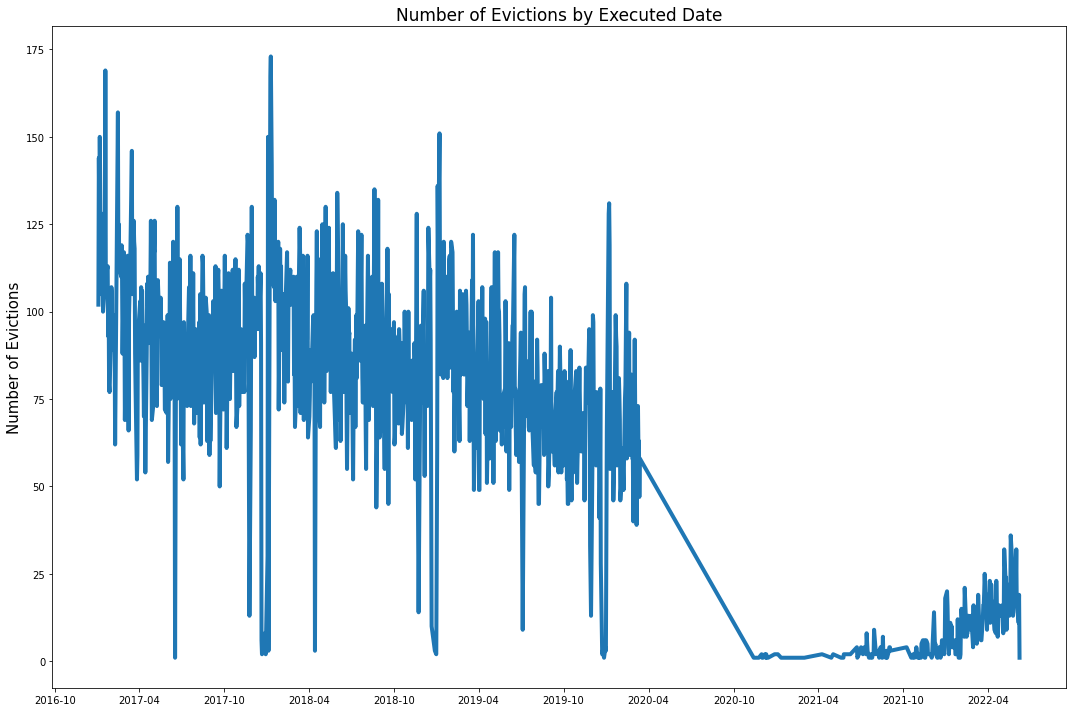

In [27]:
fig, ax = plt.subplots(figsize=(15,10))

# plotting bar chart of number of claims by year
ax.plot(time_series['Executed Date'], time_series['Evictions Count'], linewidth=4)

# displaying every year on x-axis with .MonthLocator(4)
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=None, 
                                               bymonthday=1, 
                                               interval=6, 
                                               tz=None))

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

#plt.xlabel('Executed Date', fontsize=15)
plt.ylabel('Number of Evictions', fontsize=15)
plt.title('Number of Evictions by Executed Date',
         fontsize=17)
plt.tight_layout()
#plt.savefig('figures/line-plot-2')

### Prepare data and map evictions in NYC

In [28]:
# summarize rows of data by zip code to get evictions per zip code
evictions['Evictions'] = 1
evictions_by_zip = evictions[['Eviction Postcode', 'Evictions']].groupby(['Eviction Postcode']).count().reset_index()
evictions_by_zip.head()

,Eviction Postcode,Evictions
0,0,3
1,1000,1
2,10000,1
3,10001,358
4,10002,340


In [29]:
#check for max value and for data integrity between raw and summarized data
print('The max number of evictions was {} in zip code {}.'.format(evictions_by_zip['Evictions'].max(),
        evictions_by_zip.loc[evictions_by_zip['Evictions'] == evictions_by_zip['Evictions'].max()]['Eviction Postcode'].max()))
print('The total number of evictions in the evictions dataframe from NYC Open Data is: {}.'.format(len(evictions)))
print('The total number of rows in the evictions_by_zip dataframe is: {}.'.format(len(evictions_by_zip)))
print('The total number of evictions in the evictions_by_zip dataframe is: {}.'.format(evictions_by_zip['Evictions'].sum()))

The max number of evictions was 1867 in zip code 10467.
The total number of evictions in the evictions dataframe from NYC Open Data is: 68215.
The total number of rows in the evictions_by_zip dataframe is: 224.
The total number of evictions in the evictions_by_zip dataframe is: 68215.


In [30]:
evictions_by_zip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Eviction Postcode  224 non-null    object
 1   Evictions          224 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.6+ KB


In [31]:
# use GeoJSON file from NYC opendata which contains GIS data for zip code boundaries in NYC
# web page with info on data set url here: 
# https://data.cityofnewyork.us/Health/Modified-Zip-Code-Tabulation-Areas-MODZCTA-/pri4-ifjk
zip_codes = gpd.read_file('https://data.cityofnewyork.us/resource/pri4-ifjk.geojson')
zip_codes.head()

,modzcta,label,zcta,pop_est,geometry
0,10001,"10001, 10118","10001, 10119, 10199",23072,"MULTIPOLYGON (((-73.98774 40.74407, -73.98819 ..."
1,10002,10002,10002,74993,"MULTIPOLYGON (((-73.99750 40.71407, -73.99709 ..."
2,10003,10003,10003,54682,"MULTIPOLYGON (((-73.98864 40.72293, -73.98876 ..."
3,10026,10026,10026,39363,"MULTIPOLYGON (((-73.96201 40.80551, -73.96007 ..."
4,10004,10004,10004,3028,"MULTIPOLYGON (((-74.00827 40.70772, -74.00937 ..."


In [32]:
zip_codes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   modzcta   178 non-null    object  
 1   label     178 non-null    object  
 2   zcta      178 non-null    object  
 3   pop_est   178 non-null    object  
 4   geometry  178 non-null    geometry
dtypes: geometry(1), object(4)
memory usage: 7.1+ KB


In [35]:
# merge zip code geometries into evictions_geo dataframe
evictions_geo = zip_codes.merge(evictions_by_zip, how = 'inner', left_on = 'modzcta', right_on = 'Eviction Postcode')
evictions_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 176 entries, 0 to 175
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   modzcta            176 non-null    object  
 1   label              176 non-null    object  
 2   zcta               176 non-null    object  
 3   pop_est            176 non-null    object  
 4   geometry           176 non-null    geometry
 5   Eviction Postcode  176 non-null    object  
 6   Evictions          176 non-null    int64   
dtypes: geometry(1), int64(1), object(5)
memory usage: 11.0+ KB


In [36]:
# merge median income into evictions_geo dataframe
evictions_geo = evictions_geo.merge(income, how = 'inner', left_on = 'Eviction Postcode', right_on = 'zip code tabulation area')
evictions_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 176 entries, 0 to 175
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   modzcta                   176 non-null    object  
 1   label                     176 non-null    object  
 2   zcta                      176 non-null    object  
 3   pop_est                   176 non-null    object  
 4   geometry                  176 non-null    geometry
 5   Eviction Postcode         176 non-null    object  
 6   Evictions                 176 non-null    int64   
 7   income                    176 non-null    float64 
 8   margin of error           176 non-null    float64 
 9   zip code tabulation area  176 non-null    object  
dtypes: float64(2), geometry(1), int64(1), object(6)
memory usage: 15.1+ KB


In [37]:
evictions_geo.head()

,modzcta,label,zcta,pop_est,geometry,Eviction Postcode,Evictions,income,margin of error,zip code tabulation area
0,10001,"10001, 10118","10001, 10119, 10199",23072,"MULTIPOLYGON (((-73.98774 40.74407, -73.98819 ...",10001,358,96787.0,9861.0,10001
1,10002,10002,10002,74993,"MULTIPOLYGON (((-73.99750 40.71407, -73.99709 ...",10002,340,35607.0,2214.0,10002
2,10003,10003,10003,54682,"MULTIPOLYGON (((-73.98864 40.72293, -73.98876 ...",10003,172,129981.0,8865.0,10003
3,10026,10026,10026,39363,"MULTIPOLYGON (((-73.96201 40.80551, -73.96007 ...",10026,301,64716.0,10300.0,10026
4,10004,10004,10004,3028,"MULTIPOLYGON (((-74.00827 40.70772, -74.00937 ...",10004,23,204949.0,12375.0,10004


In [39]:
evictions_geo['income'].describe()

count       176.000000
mean      80959.210227
std       38634.999840
min       23337.000000
25%       56907.000000
50%       74043.500000
75%       96522.500000
max      250001.000000
Name: income, dtype: float64

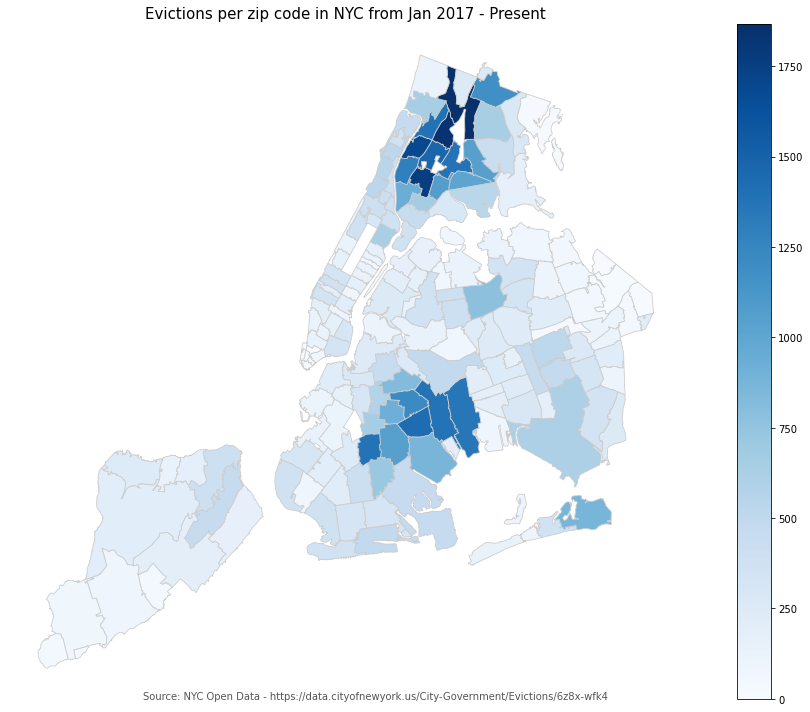

In [61]:
# set the value column that will be visualised
variable = 'Evictions'
# set the range for the choropleth values
vmin, vmax = 0, 1866
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(15, 10))
# remove the axis
ax.axis('off')
# add a title and annotation
ax.set_title('Evictions per zip code in NYC from Jan 2017 - Present', fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.annotate('Source: NYC Open Data - https://data.cityofnewyork.us/City-Government/Evictions/6z8x-wfk4', xy=(0.2, 0), 
            xycoords='axes fraction', fontsize=10, color='#555555')
# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it
# add the colorbar to the figure
fig.colorbar(sm)
# create map
evictions_geo.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
plt.tight_layout()
plt.savefig("evictions.png") #save as png

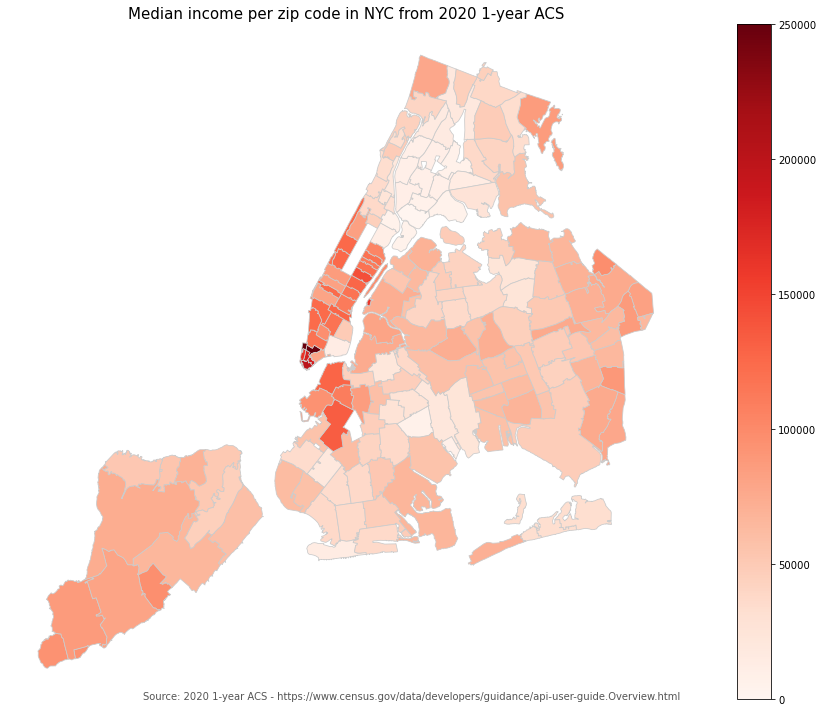

In [62]:
# set the value column that will be visualised
variable = 'income'
# set the range for the choropleth values
vmin, vmax = 0, 250001
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(15, 10))
# remove the axis
ax.axis('off')
# add a title and annotation
ax.set_title('Median income per zip code in NYC from 2020 1-year ACS', fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.annotate('Source: 2020 1-year ACS - https://www.census.gov/data/developers/guidance/api-user-guide.Overview.html', xy=(0.2, 0), 
            xycoords='axes fraction', fontsize=10, color='#555555')
# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it
# add the colorbar to the figure
fig.colorbar(sm)
# create map
evictions_geo.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8')
plt.tight_layout()
plt.savefig("income.png") #save as png

### Examine the correlation between

In [50]:
# Examine the correlation between median income and evictions
correlation = evictions_geo.corr()
correlation.style.background_gradient(cmap='coolwarm')

,Evictions,income,margin of error
Evictions,1.000000,-0.555979,0.100359
income,-0.555979,1.000000,-0.470320
margin of error,0.100359,-0.470320,1.000000


### Next Steps
* use spatial weights: https://geographicdata.science/book/notebooks/04_spatial_weights.html